<a href="https://colab.research.google.com/github/ThilinaKavinda96/earthquake-forecast-dashboard/blob/main/eq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install seaborn scikit-learn


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


In [ ]:
from google.colab import files
uploaded = files.upload()



Saving earthquacks.xlsx to earthquacks (1).xlsx
Saving query_M2.5+_2000-2024.csv to query_M2.5+_2000-2024 (1).csv


In [ ]:
import pandas as pd

# Load files
df_excel = pd.read_excel("earthquacks.xlsx")
df_csv = pd.read_csv("query_M2.5+_2000-2024.csv")

# Preview
print("Excel preview:")
display(df_excel.head())

print("CSV preview:")
display(df_csv.head())


Excel preview:


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2000-06-30T23:32:26.660Z,44.2690,146.265000,72.900,4.9,mb,10.0,NaN,NaN,0.84,...,2014-11-07T01:10:26.358Z,"39 km NE of Otrada, Russia",earthquake,NaN,7.80,NaN,1.0,reviewed,us,us
1,2000-06-30T22:36:47.300Z,-39.2300,177.470000,36.000,3.4,ml,14.0,NaN,NaN,NaN,...,2014-11-07T01:10:26.356Z,"23 km SSE of Wairoa, New Zealand",earthquake,NaN,NaN,NaN,NaN,reviewed,wel,wel
2,2000-06-30T22:33:48.400Z,50.6660,6.124000,12.600,2.6,ml,8.0,NaN,NaN,NaN,...,2014-11-07T01:10:26.354Z,"0 km ESE of Raeren, Belgium",earthquake,NaN,NaN,NaN,NaN,reviewed,ldg,ldg
3,2000-06-30T22:19:02.440Z,46.7495,-122.806333,6.287,2.7,md,25.0,66.0,0.3629,0.19,...,2016-07-23T00:01:11.860Z,"7 km SE of Bucoda, Washington",explosion,0.028,0.11,0.03,5.0,reviewed,uw,uw
4,2000-06-30T20:33:42.010Z,37.3990,141.503000,42.100,5.4,mwc,216.0,NaN,NaN,0.90,...,2022-04-29T18:43:13.619Z,"45 km ESE of Namie, Japan",earthquake,NaN,NaN,NaN,NaN,reviewed,us,hrv


CSV preview:


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2000-06-30T23:32:26.660Z,44.2690,146.265000,72.900,4.9,mb,10.0,NaN,NaN,0.84,...,2014-11-07T01:10:26.358Z,"39 km NE of Otrada, Russia",earthquake,NaN,7.80,NaN,1.0,reviewed,us,us
1,2000-06-30T22:36:47.300Z,-39.2300,177.470000,36.000,3.4,ml,14.0,NaN,NaN,NaN,...,2014-11-07T01:10:26.356Z,"23 km SSE of Wairoa, New Zealand",earthquake,NaN,NaN,NaN,NaN,reviewed,wel,wel
2,2000-06-30T22:33:48.400Z,50.6660,6.124000,12.600,2.6,ml,8.0,NaN,NaN,NaN,...,2014-11-07T01:10:26.354Z,"0 km ESE of Raeren, Belgium",earthquake,NaN,NaN,NaN,NaN,reviewed,ldg,ldg
3,2000-06-30T22:19:02.440Z,46.7495,-122.806333,6.287,2.7,md,25.0,66.0,0.3629,0.19,...,2016-07-23T00:01:11.860Z,"7 km SE of Bucoda, Washington",explosion,0.028,0.11,0.03,5.0,reviewed,uw,uw
4,2000-06-30T20:33:42.010Z,37.3990,141.503000,42.100,5.4,mwc,216.0,NaN,NaN,0.90,...,2022-04-29T18:43:13.619Z,"45 km ESE of Namie, Japan",earthquake,NaN,NaN,NaN,NaN,reviewed,us,hrv


In [ ]:
# Combine Excel and CSV data into one
df_combined = pd.concat([df_excel, df_csv], ignore_index=True)

# Drop exact duplicates (if any)
df_combined.drop_duplicates(inplace=True)

# Drop rows with missing coordinates or magnitude/depth/time
df_combined = df_combined[['latitude', 'longitude', 'mag', 'depth', 'time']].dropna()

# Reset index
df_combined.reset_index(drop=True, inplace=True)

# Convert 'time' column to datetime
df_combined['time'] = pd.to_datetime(df_combined['time'], errors='coerce')


In [ ]:
print(df_combined.info())
display(df_combined.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677678 entries, 0 to 677677
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype              
---  ------     --------------   -----              
 0   latitude   677678 non-null  float64            
 1   longitude  677678 non-null  float64            
 2   mag        677678 non-null  float64            
 3   depth      677678 non-null  float64            
 4   time       677678 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(4)
memory usage: 25.9 MB
None


,latitude,longitude,mag,depth,time
0,44.2690,146.265000,4.9,72.900,2000-06-30 23:32:26.660000+00:00
1,-39.2300,177.470000,3.4,36.000,2000-06-30 22:36:47.300000+00:00
2,50.6660,6.124000,2.6,12.600,2000-06-30 22:33:48.400000+00:00
3,46.7495,-122.806333,2.7,6.287,2000-06-30 22:19:02.440000+00:00
4,37.3990,141.503000,5.4,42.100,2000-06-30 20:33:42.010000+00:00


In [ ]:
from sklearn.preprocessing import StandardScaler

# Step 1 - Extract only location features
coords = df_combined[['latitude', 'longitude']]

# Step 2 - Normalize them (very important for DBSCAN to work correctly)
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)


In [ ]:
# Sample 10,000 points for testing
df_sample = df_combined.sample(n=10000, random_state=42).copy()

# Normalize the sample
scaler = StandardScaler()
coords_sample = scaler.fit_transform(df_sample[['latitude', 'longitude']])

# Apply DBSCAN
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.3, min_samples=10)
db.fit(coords_sample)

# Add cluster labels back to the sample
df_sample['dbscan_cluster'] = db.labels_


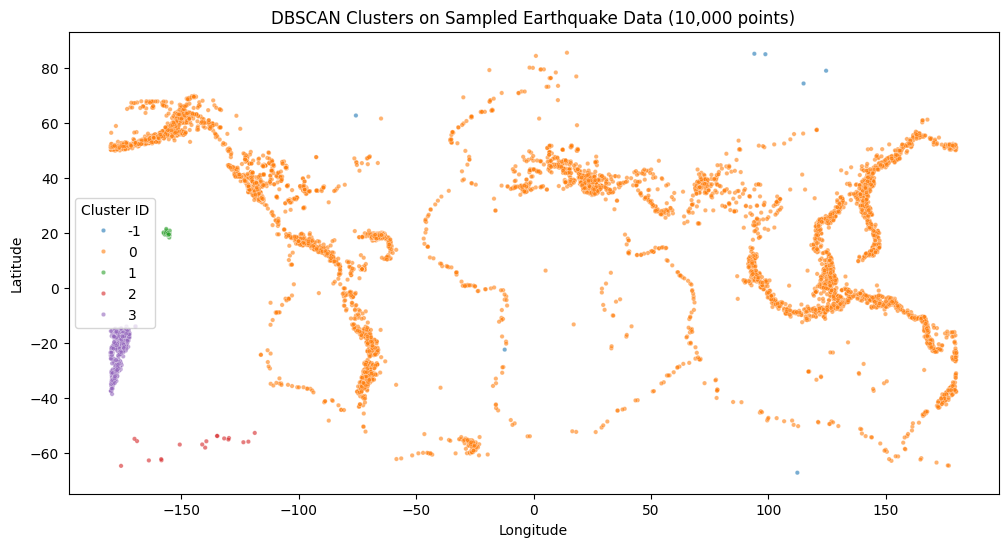

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_sample,
    x='longitude',
    y='latitude',
    hue='dbscan_cluster',
    palette='tab10',
    s=10,
    alpha=0.6
)
plt.title('DBSCAN Clusters on Sampled Earthquake Data (10,000 points)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster ID')
plt.show()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8l8ds2pj/wi86lcjj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8l8ds2pj/8_lva4wc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99878', 'data', 'file=/tmp/tmp8l8ds2pj/wi86lcjj.json', 'init=/tmp/tmp8l8ds2pj/8_lva4wc.json', 'output', 'file=/tmp/tmp8l8ds2pj/prophet_modelt8t97n7x/prophet_model-20250416060311.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:03:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:03:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


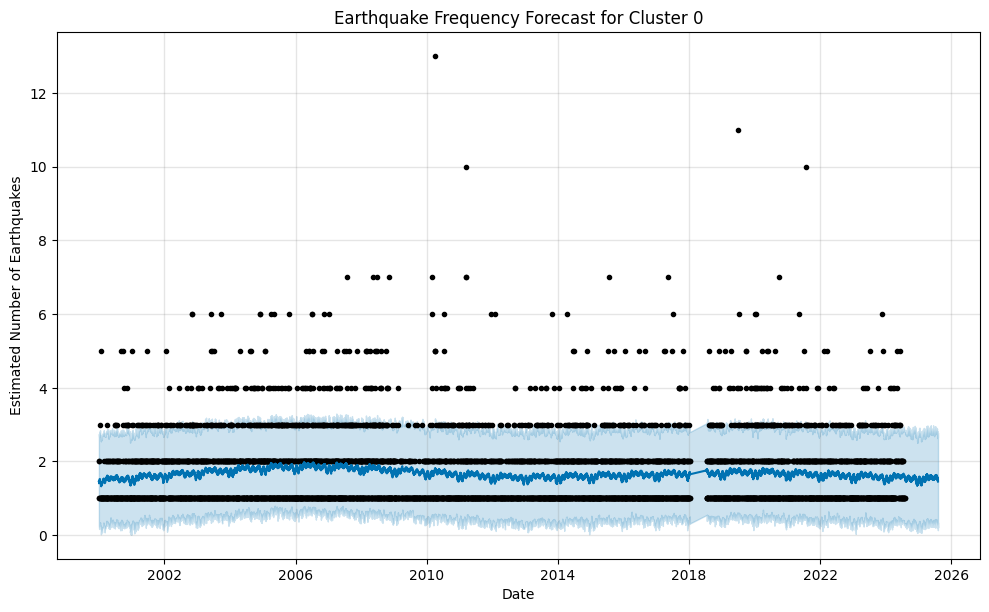

,ds,yhat,yhat_lower,yhat_upper
5856,2025-07-30,1.506634,0.204018,2.823775
5857,2025-07-31,1.578239,0.306411,2.790945
5858,2025-08-01,1.504786,0.252478,2.632619
5859,2025-08-02,1.563109,0.359954,2.817283
5860,2025-08-03,1.562423,0.281367,2.731522
5861,2025-08-04,1.537766,0.303777,2.793111
5862,2025-08-05,1.508404,0.321417,2.804565
5863,2025-08-06,1.458527,0.134776,2.649179
5864,2025-08-07,1.530383,0.346745,2.783806
5865,2025-08-08,1.457697,0.207407,2.693386


In [ ]:
# 📦 Install Prophet if you haven't already
!pip install prophet

# 📥 Import libraries
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# 🔍 Step 1 - Filter Cluster 0
df_cluster0 = df_sample[df_sample['dbscan_cluster'] == 0].copy()

# 📅 Step 2 - Create a column for Prophet
df_cluster0['ds'] = pd.to_datetime(df_cluster0['time']).dt.date
df_cluster0['y'] = 1  # each earthquake is one count

# 📊 Step 3 - Group by date
daily_counts = df_cluster0.groupby('ds')['y'].sum().reset_index()

# 🔮 Step 4 - Create and train Prophet model
model = Prophet()
model.fit(daily_counts)

# 📆 Step 5 - Create future dataframe (1 year ahead)
future = model.make_future_dataframe(periods=365)

# 📈 Step 6 - Forecast
forecast = model.predict(future)

# 📉 Step 7 - Plot forecast
fig1 = model.plot(forecast)
plt.title("Earthquake Frequency Forecast for Cluster 0")
plt.xlabel("Date")
plt.ylabel("Estimated Number of Earthquakes")
plt.grid(True)
plt.show()

# 📊 Optional: Show forecast table
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)


DEBUG:cmdstanpy:input tempfile: /tmp/tmp8l8ds2pj/0fc436db.json



🔮 Forecasting for Cluster 0...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp8l8ds2pj/8rhmek__.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15252', 'data', 'file=/tmp/tmp8l8ds2pj/0fc436db.json', 'init=/tmp/tmp8l8ds2pj/8rhmek__.json', 'output', 'file=/tmp/tmp8l8ds2pj/prophet_modeliejuyv5q/prophet_model-20250416061604.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:16:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:16:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


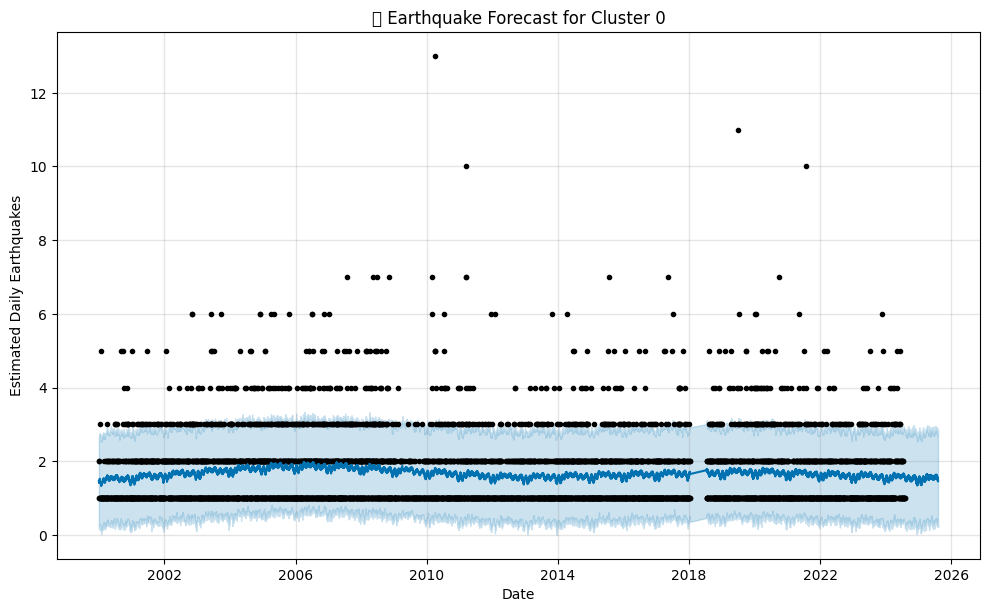

DEBUG:cmdstanpy:input tempfile: /tmp/tmp8l8ds2pj/e5_2zg3m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8l8ds2pj/nosulecy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82787', 'data', 'file=/tmp/tmp8l8ds2pj/e5_2zg3m.json', 'init=/tmp/tmp8l8ds2pj/nosulecy.json', 'output', 'file=/tmp/tmp8l8ds2pj/prophet_modeleksb16km/prophet_model-20250416061606.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:16:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:16:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



🔮 Forecasting for Cluster 1...


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


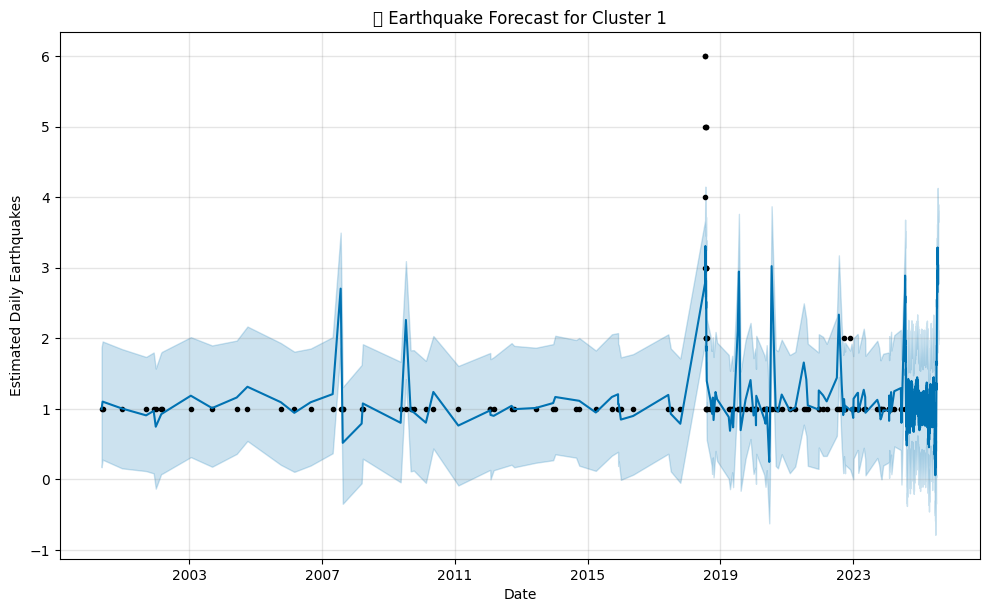


🔮 Forecasting for Cluster 2...


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


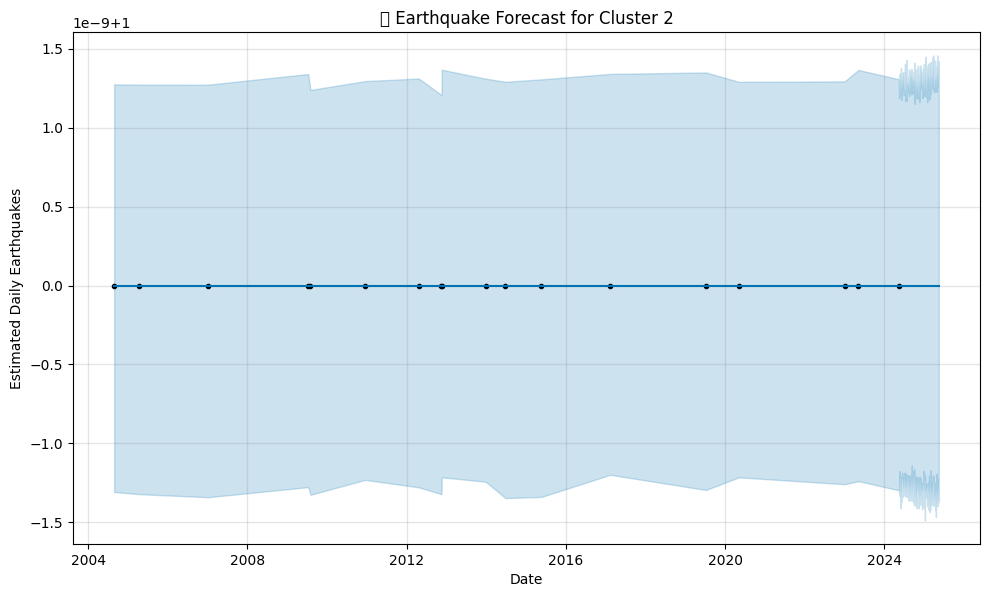

DEBUG:cmdstanpy:input tempfile: /tmp/tmp8l8ds2pj/k31djchg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8l8ds2pj/h733v_7s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17349', 'data', 'file=/tmp/tmp8l8ds2pj/k31djchg.json', 'init=/tmp/tmp8l8ds2pj/h733v_7s.json', 'output', 'file=/tmp/tmp8l8ds2pj/prophet_modeldu70rt3r/prophet_model-20250416061607.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:16:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:16:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



🔮 Forecasting for Cluster 3...


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


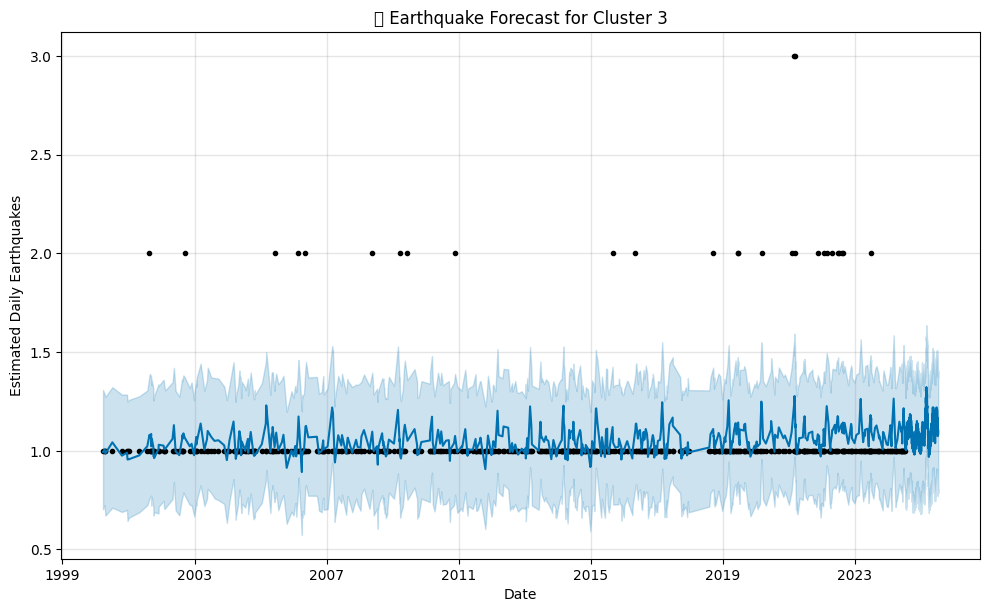

In [ ]:

# ✅ Imports
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import logging

# ✅ Optional: Reduce Prophet logging noise
logging.getLogger('prophet').setLevel(logging.WARNING)

# 📌 Dictionary to store forecast data per cluster
all_forecasts = {}

# 📋 Get unique cluster IDs (excluding noise -1)
cluster_ids = df_sample['dbscan_cluster'].unique()
cluster_ids = [cid for cid in cluster_ids if cid != -1]

# 🔁 Loop through each cluster
for cluster_id in cluster_ids:
    print(f"\n🔮 Forecasting for Cluster {cluster_id}...")

    # Step 1 - Filter data for current cluster
    cluster_data = df_sample[df_sample['dbscan_cluster'] == cluster_id].copy()

    # Step 2 - Format for Prophet
    cluster_data['ds'] = pd.to_datetime(cluster_data['time']).dt.date
    cluster_data['y'] = 1  # each row = 1 earthquake

    # Step 3 - Count earthquakes per day
    daily_counts = cluster_data.groupby('ds')['y'].sum().reset_index()

    # Step 4 - Skip if too little data
    if len(daily_counts) < 10:
        print(f"❌ Skipping Cluster {cluster_id} (too little data)")
        continue

    # Step 5 - Train Prophet model
    model = Prophet()
    model.fit(daily_counts)

    # Step 6 - Create future dates (next 365 days)
    future = model.make_future_dataframe(periods=365)

    # Step 7 - Predict
    forecast = model.predict(future)

    # Step 8 - Save everything
    all_forecasts[cluster_id] = {
        'model': model,
        'forecast': forecast,
        'daily_counts': daily_counts
    }

    # Step 9 - Plot forecast
    fig = model.plot(forecast)
    plt.title(f"📈 Earthquake Forecast for Cluster {cluster_id}")
    plt.xlabel("Date")
    plt.ylabel("Estimated Daily Earthquakes")
    plt.grid(True)
    plt.show()


In [ ]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 79.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.1 MB/s eta 0:00:00


2025-04-16 06:20:41.925 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-04-16 06:20:41.928 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-04-16 06:20:41.932 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-16 06:20:42.258 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-04-16 06:20:42.261 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-16 06:20:42.263 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-16 06:20:42.331 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-16 06:20:42.332 Thread 'MainThread': missin

DeltaGenerator()

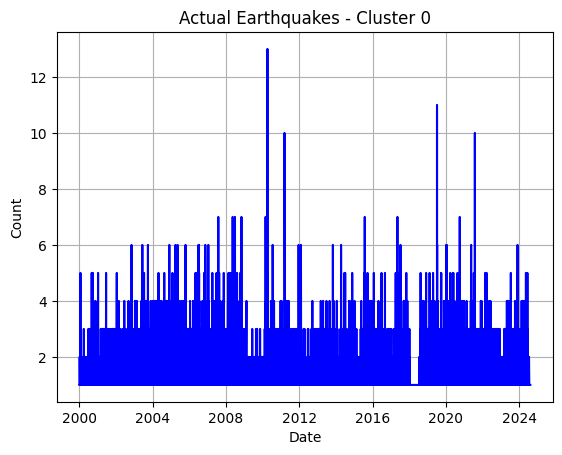

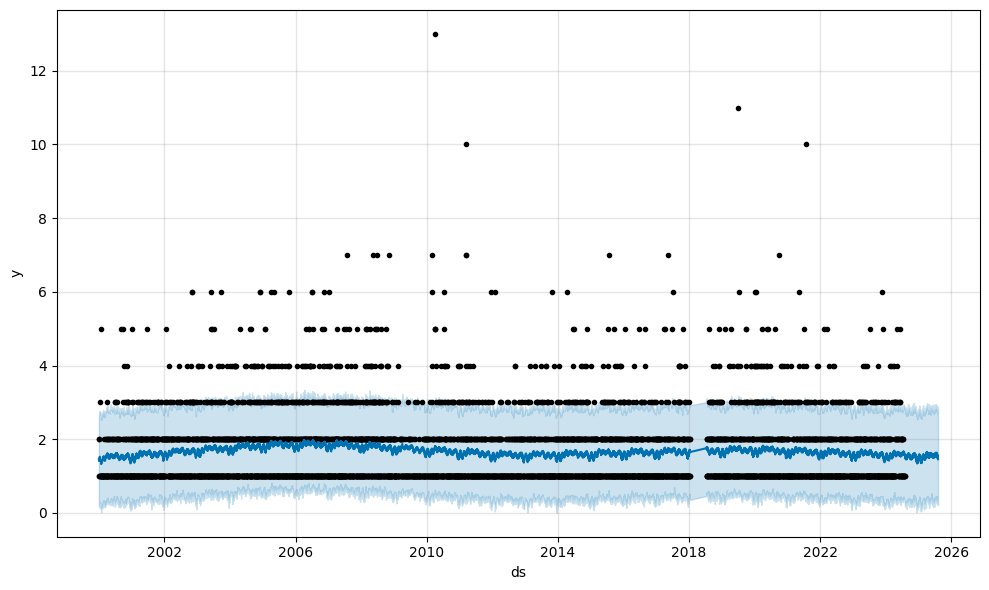

In [ ]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Load saved forecasts (use pickle or recreate in the same script)
@st.cache_data
def load_data():
    # For now, you must paste or load `all_forecasts` from earlier
    # If saved with pickle, load here
    return all_forecasts

# Load data
all_forecasts = load_data()

# Sidebar: Select a cluster
cluster_ids = sorted(all_forecasts.keys())
selected_cluster = st.sidebar.selectbox("Select a Cluster", cluster_ids)

# Get data for selected cluster
model = all_forecasts[selected_cluster]['model']
forecast = all_forecasts[selected_cluster]['forecast']
daily_counts = all_forecasts[selected_cluster]['daily_counts']

# Title
st.title(f"🌍 Earthquake Forecast Dashboard")
st.subheader(f"📊 Forecast for Cluster {selected_cluster}")

# Plot actual daily earthquake counts
st.markdown("### Historical Earthquakes")
fig1, ax1 = plt.subplots()
ax1.plot(daily_counts['ds'], daily_counts['y'], label='Actual', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Count')
ax1.set_title(f'Actual Earthquakes - Cluster {selected_cluster}')
ax1.grid(True)
st.pyplot(fig1)

# Plot forecast
st.markdown("### Prophet Forecast")
fig2 = model.plot(forecast)
st.pyplot(fig2)

# Forecast table (optional)
st.markdown("### Forecast Table (next 10 days)")
st.dataframe(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10))


In [ ]:
import pickle
with open("all_forecasts.pkl", "wb") as f:
    pickle.dump(all_forecasts, f)


In [ ]:
from google.colab import files
files.download("all_forecasts.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install geopy tqdm

from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from tqdm import tqdm
import time

geolocator = Nominatim(user_agent="earthquake_forecaster")

def get_country(lat, lon):
    try:
        location = geolocator.reverse((lat, lon), language='en', timeout=10)
        return location.raw['address'].get('country', None)
    except GeocoderTimedOut:
        time.sleep(1)
        return get_country(lat, lon)
    except:
        return None

# Sample 10,000 for demo
df_sample = df_combined.sample(n=10000, random_state=42).copy()

tqdm.pandas()
df_sample['country'] = df_sample.progress_apply(lambda row: get_country(row['latitude'], row['longitude']), axis=1)

# Save to speed up next runs
df_sample.to_csv("sample_with_country.csv", index=False)


100%|██████████| 10000/10000 [2:46:50<00:00,  1.00s/it]


In [ ]:
import pandas as pd

# Load the CSV you saved earlier
df = pd.read_csv("sample_with_country.csv")

# Drop rows with missing fields
df = df.dropna(subset=['latitude', 'longitude', 'depth', 'mag', 'country'])


In [ ]:
# Create classes: Low (0–3.9), Moderate (4–5.9), Severe (6–10)
df['mag_class'] = pd.cut(
    df['mag'],
    bins=[0, 3.9, 5.9, 10],
    labels=['Low', 'Moderate', 'Severe']
)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert country to numeric label
country_encoder = LabelEncoder()
df['country_encoded'] = country_encoder.fit_transform(df['country'])

# Features: location + depth + country
X = df[['latitude', 'longitude', 'depth', 'country_encoded']]
y = df['mag_class']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         Low       0.90      0.92      0.91       711
    Moderate       0.88      0.85      0.86       494
      Severe       0.00      0.00      0.00         2

    accuracy                           0.89      1207
   macro avg       0.59      0.59      0.59      1207
weighted avg       0.89      0.89      0.89      1207



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Example input: Colombo region
example = pd.DataFrame({
    'latitude': [6.9271],
    'longitude': [79.8612],
    'depth': [10],
    'country_encoded': [country_encoder.transform(['Sri Lanka'])[0]]
})

predicted_class = model.predict(example)
print("Predicted Magnitude Class:", predicted_class[0])


ValueError: y contains previously unseen labels: 'Sri Lanka'

In [ ]:
# One-hot encode the 'country' column
df_encoded = pd.get_dummies(df, columns=['country'])


In [ ]:
from sklearn.model_selection import train_test_split

# Features: lat, lon, depth + country columns
X = df_encoded.drop(columns=['mag', 'mag_class', 'time'])  # drop unnecessary columns
y = df_encoded['mag_class']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         Low       0.90      0.92      0.91       711
    Moderate       0.88      0.85      0.87       494
      Severe       0.00      0.00      0.00         2

    accuracy                           0.89      1207
   macro avg       0.59      0.59      0.59      1207
weighted avg       0.89      0.89      0.89      1207



In [ ]:
# Create a base row with all columns from X
example = pd.DataFrame(columns=X.columns)
example.loc[0] = 0  # Initialize with zeros

# Set the location/depth
example.at[0, 'latitude'] = 6.9271
example.at[0, 'longitude'] = 79.8612
example.at[0, 'depth'] = 10

# Set the country column to 1
if 'country_Nepal' in example.columns:
    example.at[0, 'country_Nepal'] = 1
else:
    print("❌ 'Sri Lanka' was not in the training data (OneHot column missing)")

# Predict
prediction = model.predict(example)
print("Predicted Magnitude Class:", prediction[0])


❌ 'Sri Lanka' was not in the training data (OneHot column missing)
Predicted Magnitude Class: Moderate


<ipython-input-29-fc12b0ab54b2>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '6.9271' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  example.at[0, 'latitude'] = 6.9271
<ipython-input-29-fc12b0ab54b2>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '79.8612' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  example.at[0, 'longitude'] = 79.8612


In [ ]:
# Function to predict magnitude class from location + country
def predict_magnitude_class(lat, lon, depth, country_name):
    # Step 1: Create a base row with all zero columns
    example = pd.DataFrame(columns=X.columns)
    example.loc[0] = 0  # initialize all fields with 0

    # Step 2: Fill in the input location and depth
    example.at[0, 'latitude'] = lat
    example.at[0, 'longitude'] = lon
    example.at[0, 'depth'] = depth

    # Step 3: Find the correct country column name
    country_col = f'country_{India}'

    # Step 4: Set the country column to 1 if it exists
    if country_col in example.columns:
        example.at[0, country_col] = 1
    else:
        print(f"❌ '{country_name}' not in training data. Can't predict.")
        return

    # Step 5: Predict the magnitude class
    prediction = model.predict(example)
    print(f"📍 Location: {lat}, {lon} in {country_name}")
    print(f"🌋 Predicted Magnitude Class: {prediction[0]}")


In [ ]:
# Create a summary DataFrame
top_predictions = []

for country, data in country_forecasts.items():
    forecast = data['forecast']

    # Get future predictions only (skip historical part)
    future_only = forecast[forecast['ds'] > pd.Timestamp.today()]

    # Find the day with the highest predicted count
    top_day = future_only.sort_values(by='yhat', ascending=False).head(1)

    top_predictions.append({
        'country': country,
        'date': top_day['ds'].values[0],
        'predicted_quakes': top_day['yhat'].values[0]
    })

# Convert to DataFrame
top_df = pd.DataFrame(top_predictions)

# Sort to get highest activity countries
top_df = top_df.sort_values(by='predicted_quakes', ascending=False)

# Show top 10
top_df.head(10)


NameError: name 'country_forecasts' is not defined

In [ ]:
import pickle

# Load from saved file
with open("country_forecasts_5yr.pkl", "rb") as f:
    country_forecasts = pickle.load(f)


FileNotFoundError: [Errno 2] No such file or directory: 'country_forecasts_5yr.pkl'

In [ ]:
from prophet import Prophet
import pandas as pd

country_forecasts = {}
target_countries = df_sample['country'].dropna().unique()

for country in target_countries:
    df_country = df_sample[df_sample['country'] == country].copy()

    df_country['ds'] = pd.to_datetime(df_country['time']).dt.date
    df_country['y'] = 1
    daily_counts = df_country.groupby('ds')['y'].sum().reset_index()

    if len(daily_counts) < 10:
        continue

    model = Prophet()
    model.fit(daily_counts)

    # Forecast for 5 years
    future = model.make_future_dataframe(periods=1825)  # 365 x 5
    forecast = model.predict(future)

    country_forecasts[country] = {
        "model": model,
        "forecast": forecast,
        "actual": daily_counts
    }


DEBUG:cmdstanpy:input tempfile: /tmp/tmp8l8ds2pj/c9ju06ky.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8l8ds2pj/op24rour.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54798', 'data', 'file=/tmp/tmp8l8ds2pj/c9ju06ky.json', 'init=/tmp/tmp8l8ds2pj/op24rour.json', 'output', 'file=/tmp/tmp8l8ds2pj/prophet_modele6r95p9e/prophet_model-20250416102445.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:24:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:24:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8l8ds2pj/i3zr7mid.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8l8ds2pj/th2h_1tv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [ ]:
top_predictions = []

for country, data in country_forecasts.items():
    forecast = data['forecast']
    future_only = forecast[forecast['ds'] > pd.Timestamp.today()]

    top_day = future_only.sort_values(by='yhat', ascending=False).head(1)

    top_predictions.append({
        'country': country,
        'date': top_day['ds'].values[0],
        'predicted_quakes': top_day['yhat'].values[0]
    })

top_df = pd.DataFrame(top_predictions)
top_df = top_df.sort_values(by='predicted_quakes', ascending=False)

top_df.head(10)


IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
top_predictions = []

for country, data in country_forecasts.items():
    forecast = data['forecast']

    # Filter future dates only
    future_only = forecast[forecast['ds'] > pd.Timestamp.today()]

    # ✅ Skip countries with no future predictions
    if future_only.empty:
        continue

    # Get the top forecasted day
    top_day = future_only.sort_values(by='yhat', ascending=False).head(1)

    # ✅ Also skip if top_day is still empty
    if top_day.empty:
        continue

    top_predictions.append({
        'country': country,
        'date': top_day['ds'].values[0],
        'predicted_quakes': top_day['yhat'].values[0]
    })

# Combine and sort
top_df = pd.DataFrame(top_predictions)
top_df = top_df.sort_values(by='predicted_quakes', ascending=False)

# Show top 10 high-risk countries
top_df.head(10)


,country,date,predicted_quakes
16,Morocco,2025-09-25,322.211646
30,Iceland,2029-03-23,129.713123
7,Nicaragua,2028-09-19,114.903486
5,Pakistan,2026-08-30,63.591584
42,Taiwan,2026-11-01,48.994535
6,Albania,2025-10-22,9.475574
24,France,2026-12-14,2.820085
17,China,2027-05-10,2.573571
21,Mexico,2027-04-05,2.368272
27,Iran,2026-02-16,2.229711


from matplotlib import pyplot as plt
_df_0['predicted_quakes'].plot(kind='hist', bins=20, title='predicted_quakes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['predicted_quakes']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('predicted_quakes')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['predicted_quakes']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('predicted_quakes')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['predicted_quakes'].plot(kind='line', figsize=(8, 4), title='predicted_quakes')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
def classify_magnitude(pred_quakes):
    if pred_quakes < 1:
        return 'Low (0–3.9)'
    elif pred_quakes < 3:
        return 'Moderate (4.0–5.9)'
    else:
        return 'Severe (6.0+)'

top_predictions = []

for country, data in country_forecasts.items():
    forecast = data['forecast']

    # Future only
    future_only = forecast[forecast['ds'] > pd.Timestamp.today()]
    if future_only.empty:
        continue

    # Peak day
    top_day = future_only.sort_values(by='yhat', ascending=False).head(1)
    if top_day.empty:
        continue

    yhat_val = top_day['yhat'].values[0]
    mag_range = classify_magnitude(yhat_val)

    top_predictions.append({
        'country': country,
        'date': top_day['ds'].values[0],
        'predicted_quakes': yhat_val,
        'magnitude_range': mag_range
    })

# Convert and sort
top_df = pd.DataFrame(top_predictions)
top_df = top_df.sort_values(by='predicted_quakes', ascending=False)

# Show result
top_df.head(10)


,country,date,predicted_quakes,magnitude_range
16,Morocco,2025-09-25,322.211646,Severe (6.0+)
30,Iceland,2029-03-23,129.713123,Severe (6.0+)
7,Nicaragua,2028-09-19,114.903486,Severe (6.0+)
5,Pakistan,2026-08-30,63.591584,Severe (6.0+)
42,Taiwan,2026-11-01,48.994535,Severe (6.0+)
6,Albania,2025-10-22,9.475574,Severe (6.0+)
24,France,2026-12-14,2.820085,Moderate (4.0–5.9)
17,China,2027-05-10,2.573571,Moderate (4.0–5.9)
21,Mexico,2027-04-05,2.368272,Moderate (4.0–5.9)
27,Iran,2026-02-16,2.229711,Moderate (4.0–5.9)


In [ ]:
# Example output columns:
# date, country, predicted_quakes, magnitude_range

df.to_csv("updated_forecast.csv", index=False)


In [ ]:
from google.colab import files
files.download("updated_forecast.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_sample['ds'] = pd.to_datetime(df_sample['time']).dt.date
df_sample['y'] = 1  # 1 row = 1 earthquake


In [ ]:
def classify_magnitude(yhat):
    if yhat < 0.5:
        return 'Low (0–3.9)'
    elif yhat < 2:
        return 'Moderate (4.0–5.9)'
    else:
        return 'Severe (6.0+)'


In [ ]:
from prophet import Prophet
from datetime import timedelta
import pandas as pd

future_preds = []

for country in df_sample['country'].dropna().unique():
    country_df = df_sample[df_sample['country'] == country]

    if len(country_df) < 10:
        continue

    # Group by date
    daily_counts = country_df.groupby('ds')['y'].sum().reset_index()

    model = Prophet()
    model.fit(daily_counts)

    # Forecast for 5 years (365 × 5)
    future = model.make_future_dataframe(periods=1825)
    forecast = model.predict(future)

    # Only future dates
    forecast_future = forecast[forecast['ds'] > pd.Timestamp.today().date()]

    for _, row in forecast_future.iterrows():
        future_preds.append({
            'time': row['ds'],
            'country': country,
            'predicted_quakes': row['yhat'],
            'magnitude_range': classify_magnitude(row['yhat'])
        })


DEBUG:cmdstanpy:input tempfile: /tmp/tmp8l8ds2pj/hff6bg3x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8l8ds2pj/wf7d4_ev.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72227', 'data', 'file=/tmp/tmp8l8ds2pj/hff6bg3x.json', 'init=/tmp/tmp8l8ds2pj/wf7d4_ev.json', 'output', 'file=/tmp/tmp8l8ds2pj/prophet_model6szkl19v/prophet_model-20250416114739.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:47:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:47:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


TypeError: Invalid comparison between dtype=datetime64[ns] and date

In [ ]:
# 📦 Install if not already done
!pip install prophet

# 📚 Imports
import pandas as pd
from prophet import Prophet
from datetime import datetime
import numpy as np

# ✅ Your cleaned dataset: df_sample with columns ['time', 'country']
df_sample['ds'] = pd.to_datetime(df_sample['time']).dt.tz_localize(None).dt.date
df_sample['y'] = 1  # 1 event = 1 quake

# 🎯 Define magnitude classifier based on predicted quake count
def classify_magnitude(yhat):
    if yhat < 0.5:
        return 'Low (0–3.9)'
    elif yhat < 2:
        return 'Moderate (4.0–5.9)'
    else:
        return 'Severe (6.0+)'

# 🔁 Loop through countries and forecast
future_preds = []

for country in df_sample['country'].dropna().unique():
    country_df = df_sample[df_sample['country'] == country]

    if len(country_df) < 10:
        continue

    daily_counts = country_df.groupby('ds')['y'].sum().reset_index()

    try:
        model = Prophet()
        model.fit(daily_counts)

        future = model.make_future_dataframe(periods=1825)  # 5 years
        forecast = model.predict(future)

        # ✅ FIX: Use Timestamp today to match dtype
        forecast_future = forecast[forecast['ds'] > pd.Timestamp.today()]

        for _, row in forecast_future.iterrows():
            future_preds.append({
                'time': row['ds'],
                'country': country,
                'predicted_quakes': row['yhat'],
                'magnitude_range': classify_magnitude(row['yhat'])
            })

    except Exception as e:
        print(f"⚠️ Skipped {country} due to error: {e}")

# 📊 Final forecast DataFrame
df_forecast = pd.DataFrame(future_preds)

# 💾 Export as CSV
df_forecast.to_csv("updated_forecast.csv", index=False)

# ⬇️ Download the file to your PC
from google.colab import files
files.download("updated_forecast.csv")


DEBUG:cmdstanpy:input tempfile: /tmp/tmp8l8ds2pj/jiw7x4ua.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8l8ds2pj/f57hpzo8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68253', 'data', 'file=/tmp/tmp8l8ds2pj/jiw7x4ua.json', 'init=/tmp/tmp8l8ds2pj/f57hpzo8.json', 'output', 'file=/tmp/tmp8l8ds2pj/prophet_modelnsvtt2vd/prophet_model-20250416115241.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:52:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:52:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8l8ds2pj/rxei12l3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8l8ds2pj/88od55_v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Fix: Rename column properly
df_forecast.rename(columns={"predicted_": "predicted_quakes"}, inplace=True)

# Fix encoding issue (save as UTF-8 with BOM for Excel to read correctly)
df_forecast.to_csv("updated_forecast.csv", index=False, encoding='utf-8-sig')

# Download to local
from google.colab import files
files.download("updated_forecast.csv")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Extract country-wise average coordinates
country_locs = df_sample.groupby("country")[["latitude", "longitude"]].mean().reset_index()


In [ ]:
lat = country_locs[country_locs["country"] == country]["latitude"].values[0]
lon = country_locs[country_locs["country"] == country]["longitude"].values[0]

future_preds.append({
    "time": row["ds"],
    "country": country,
    "predicted_quakes": row["yhat"],
    "magnitude_range": classify_magnitude(row["yhat"]),
    "latitude": lat,
    "longitude": lon
})


In [ ]:
df_forecast = pd.DataFrame(future_preds)
df_forecast.to_csv("updated_forecast.csv", index=False)

# Download to local
from google.colab import files
files.download("updated_forecast.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Assuming df_sample contains past earthquake data with lat/lon
country_coords = df_sample.groupby("country")[["latitude", "longitude"]].mean().reset_index()


In [ ]:
# Merge coordinates into forecast
df_forecast = df_forecast.merge(country_coords, on="country", how="left")


In [ ]:
# Save with coordinates
df_forecast.to_csv("updated_forecast.csv", index=False)

# Download it
from google.colab import files
files.download("updated_forecast.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_forecast = df_forecast.rename(columns={
    "latitude_y": "latitude",
    "longitude_y": "longitude"
})


In [ ]:
df_forecast = df_forecast[["time", "country", "predicted_quakes", "magnitude_range", "latitude", "longitude"]]


In [ ]:
df_forecast.to_csv("updated_forecast.csv", index=False, encoding="utf-8-sig")

from google.colab import files
files.download("updated_forecast.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
streamlit run streamlit_app.py


SyntaxError: invalid syntax (<ipython-input-15-5124338ac38b>, line 1)

In [ ]:
from sklearn.cluster import DBSCAN

# Step 3 - Create DBSCAN model
db = DBSCAN(eps=0.3, min_samples=10)

# Step 4 - Fit model to scaled coordinates
db.fit(coords_scaled)

# Step 5 - Save labels to dataframe
df_combined['dbscan_cluster'] = db.labels_


NameError: name 'coords_scaled' is not defined

In [ ]:
!cat /proc/meminfo


MemTotal:       13290460 kB
MemFree:        11073996 kB
MemAvailable:   12033248 kB
Buffers:          145580 kB
Cached:          1019188 kB
SwapCached:            0 kB
Active:           604684 kB
Inactive:        1385028 kB
Active(anon):       1300 kB
Inactive(anon):   825332 kB
Active(file):     603384 kB
Inactive(file):   559696 kB
Unevictable:           8 kB
Mlocked:               8 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               204 kB
Writeback:             0 kB
AnonPages:        824972 kB
Mapped:           267964 kB
Shmem:              1676 kB
KReclaimable:      74220 kB
Slab:             110524 kB
SReclaimable:      74220 kB
SUnreclaim:        36304 kB
KernelStack:        5360 kB
PageTables:        15404 kB
SecPageTables:         0 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6645228 kB
Committed_AS:    2832724 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       11688 kB
VmallocChunk:    